<a href="https://colab.research.google.com/github/Anakad1/bootcampgenai/blob/main/w3d3daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files in the current directory:
.config
Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv
sample_data
File read successfully.


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


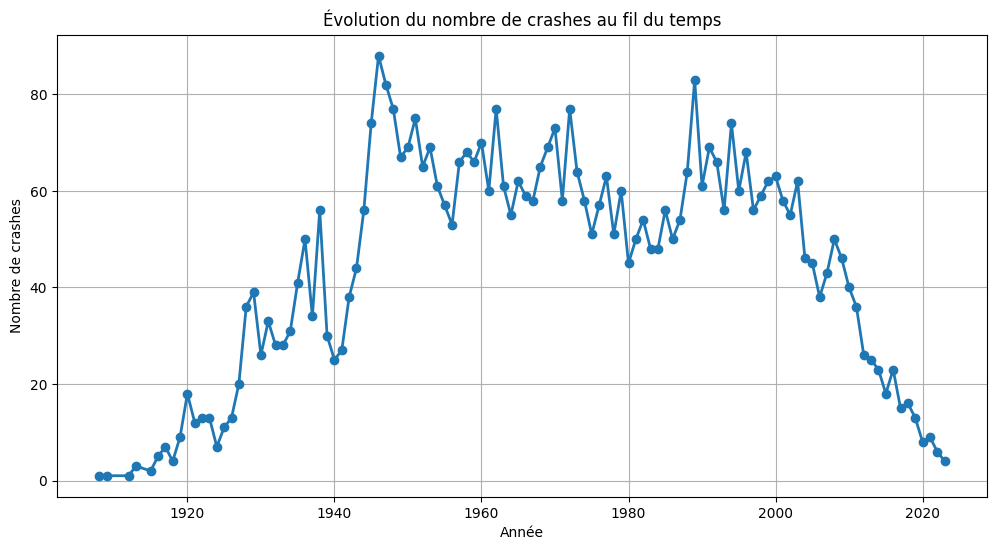

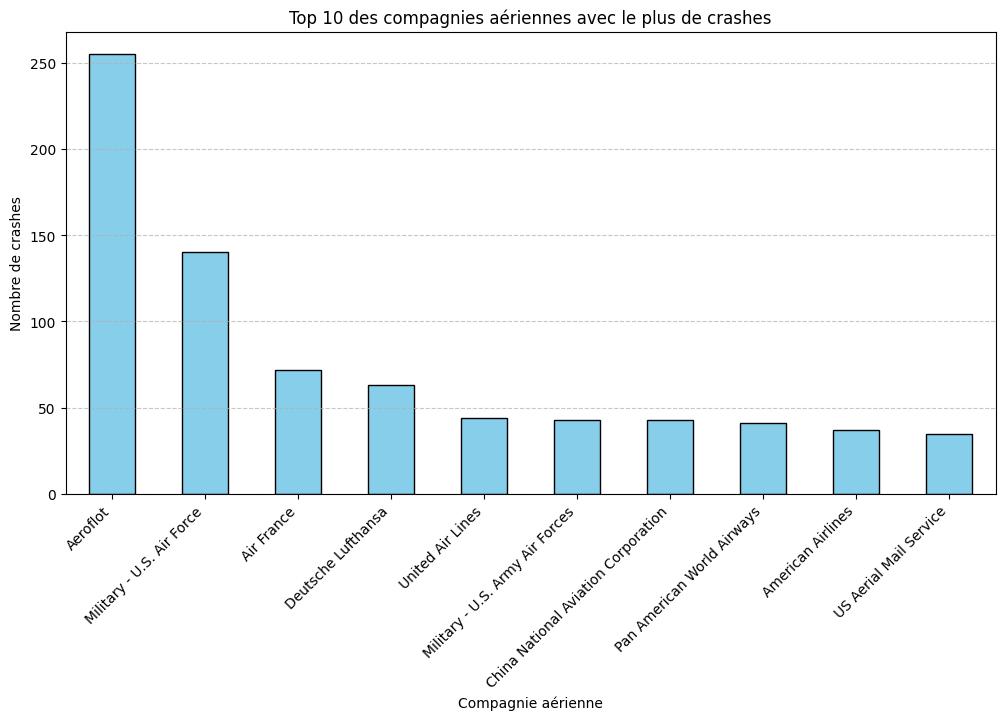

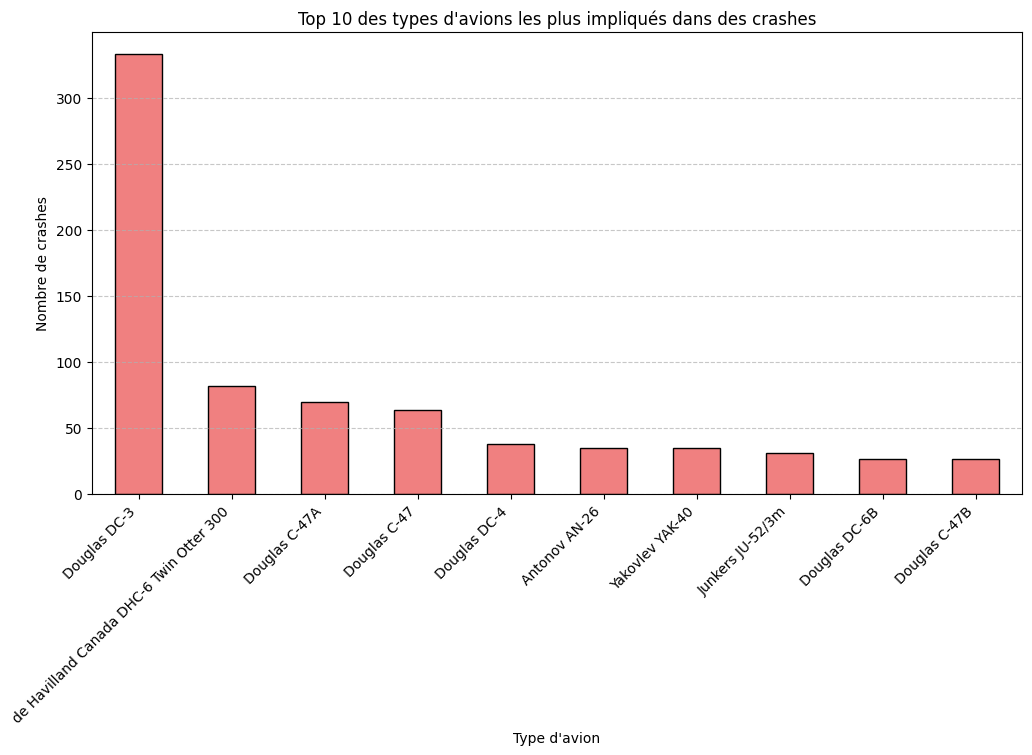

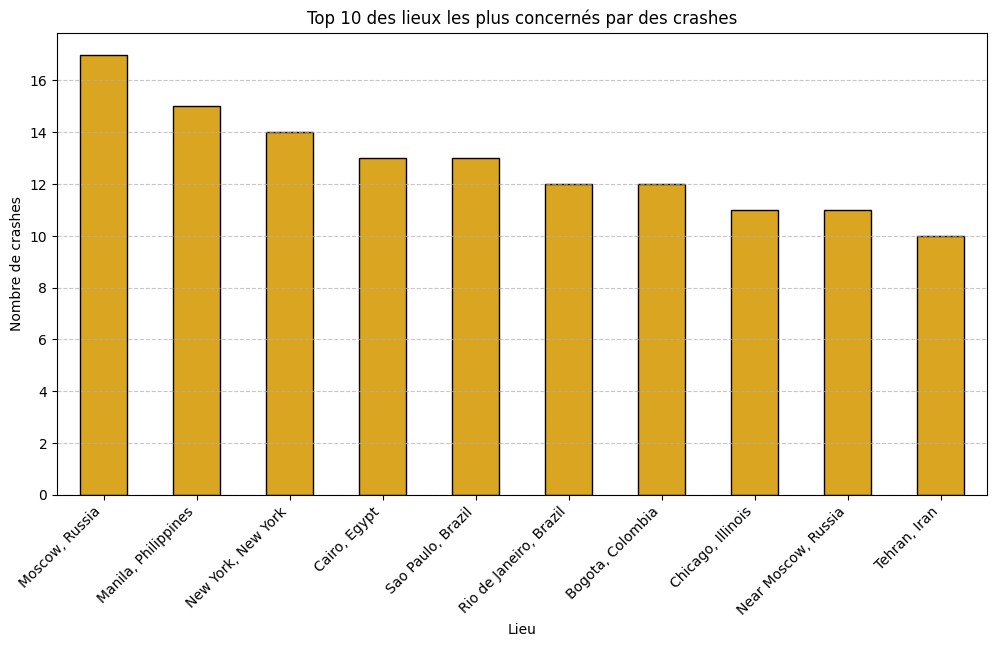

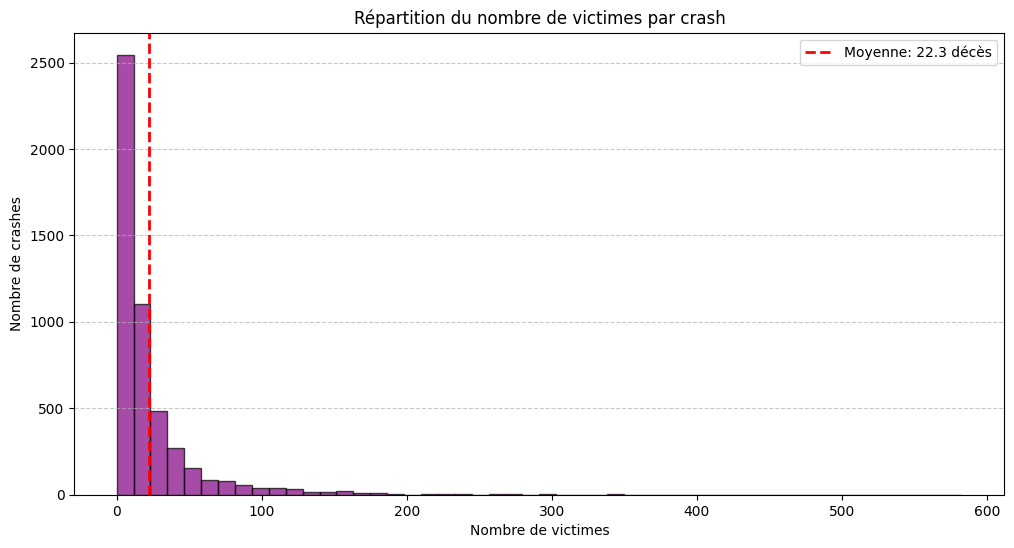

In [18]:

!pip install wget


import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import wget
from google.colab import files


uploaded = files.upload()


print("Files in the current directory:")
for filename in os.listdir('.'):
    print(filename)


try:
    df = pd.read_csv(
        'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1'
    )
    print("File read successfully.")
except UnicodeDecodeError as e:
    print(f"Error: {e}")
    print(
        "The 'latin-1' encoding did not solve the problem. Please check the file encoding and try another."
    )
except FileNotFoundError:
    print("File not found. Please ensure the file has been uploaded correctly.")


if 'df' in locals():
    display(df.head())

# Étape 2 : Nettoyage des données
df.fillna({
    "Time": "Inconnu", "Location": "Inconnu", "Operator": "Inconnu", "Flight #": "Inconnu",
    "Route": "Inconnu", "AC Type": "Inconnu", "Registration": "Inconnu", "cn/ln": "Inconnu",
    "Summary": "Inconnu"
}, inplace=True)

num_cols = ["Aboard", "Aboard Passangers", "Aboard Crew", "Fatalities", "Fatalities Passangers", "Fatalities Crew", "Ground"]
df[num_cols] = df[num_cols].fillna(0)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")
df["Year"] = df["Date"].dt.year

# Étape 3 : Analyse des tendances et visualisations
plt.figure(figsize=(12,6))
plt.plot(df.groupby('Year').size(), marker='o', linestyle='-', linewidth=2)
plt.title("Évolution du nombre de crashes au fil du temps")
plt.xlabel("Année")
plt.ylabel("Nombre de crashes")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
df["Operator"].value_counts().head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 des compagnies aériennes avec le plus de crashes")
plt.xlabel("Compagnie aérienne")
plt.ylabel("Nombre de crashes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
df["AC Type"].value_counts().head(10).plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Top 10 des types d'avions les plus impliqués dans des crashes")
plt.xlabel("Type d'avion")
plt.ylabel("Nombre de crashes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
df["Location"].value_counts().head(10).plot(kind="bar", color="goldenrod", edgecolor="black")
plt.title("Top 10 des lieux les plus concernés par des crashes")
plt.xlabel("Lieu")
plt.ylabel("Nombre de crashes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

mean_fatalities = df["Fatalities"].mean()
plt.figure(figsize=(12,6))
plt.hist(df["Fatalities"], bins=50, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(mean_fatalities, color="red", linestyle="dashed", linewidth=2, label=f'Moyenne: {mean_fatalities:.1f} décès')
plt.title("Répartition du nombre de victimes par crash")
plt.xlabel("Nombre de victimes")
plt.ylabel("Nombre de crashes")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
